# House Loan Data Analysis

In [1]:
import warnings

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rakes\Desktop\Rakhi\Project\Deep_learning\loan_data.csv")
df = df.drop(['SK_ID_CURR'], axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("The shape of dataset is :- ", df.shape)

The shape of dataset is :-  (307511, 121)


In [4]:
df = df[pd.notnull(df['EMERGENCYSTATE_MODE'])]

In [5]:
df = df.loc[df['CODE_GENDER'] != 'XNA']

### Filling the missing value in label column

In [6]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan, 'Other_C')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan, 'Others')
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].replace(np.nan, 'Others')
df['HOUSETYPE_MODE'] = df['HOUSETYPE_MODE'].replace(np.nan, 'Unkown')
df['FONDKAPREMONT_MODE'] = df['FONDKAPREMONT_MODE'].replace(np.nan, 'not available')

In [7]:
df = df[pd.notnull(df['AMT_REQ_CREDIT_BUREAU_YEAR'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 131.6+ MB


In [9]:
labels = df.describe(include=['object']).columns.values
labels

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

### Lable encoding

In [10]:
le = LabelEncoder()
for lab in labels:
    le.fit(df[lab].values)
    df[lab] = le.transform(df[lab])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(40)
memory usage: 122.9 MB


### Imputing the missing values 

In [11]:
def missing_percentage(df):
    null_columns = list(filter(lambda x: df[x].isna().any(), df.columns))
    print("There are {} columns with missing values".format(len(null_columns)))
    total_rows = df.shape[0]
    missing_dict = {
        i: round((df[i].isnull().sum() / total_rows) * 100, 2) for i in null_columns
    }
    return missing_dict


missing_percentage(df)

There are 54 columns with missing values


{'AMT_ANNUITY': 0.0,
 'AMT_GOODS_PRICE': 0.08,
 'OWN_CAR_AGE': 66.84,
 'CNT_FAM_MEMBERS': 0.0,
 'EXT_SOURCE_1': 53.92,
 'EXT_SOURCE_2': 0.18,
 'EXT_SOURCE_3': 7.44,
 'APARTMENTS_AVG': 6.34,
 'BASEMENTAREA_AVG': 21.04,
 'YEARS_BEGINEXPLUATATION_AVG': 2.61,
 'YEARS_BUILD_AVG': 36.21,
 'COMMONAREA_AVG': 42.64,
 'ELEVATORS_AVG': 11.14,
 'ENTRANCES_AVG': 5.55,
 'FLOORSMAX_AVG': 4.44,
 'FLOORSMIN_AVG': 38.82,
 'LANDAREA_AVG': 22.63,
 'LIVINGAPARTMENTS_AVG': 39.75,
 'LIVINGAREA_AVG': 5.29,
 'NONLIVINGAPARTMENTS_AVG': 41.79,
 'NONLIVINGAREA_AVG': 14.72,
 'APARTMENTS_MODE': 6.34,
 'BASEMENTAREA_MODE': 21.04,
 'YEARS_BEGINEXPLUATATION_MODE': 2.61,
 'YEARS_BUILD_MODE': 36.21,
 'COMMONAREA_MODE': 42.64,
 'ELEVATORS_MODE': 11.14,
 'ENTRANCES_MODE': 5.55,
 'FLOORSMAX_MODE': 4.44,
 'FLOORSMIN_MODE': 38.82,
 'LANDAREA_MODE': 22.63,
 'LIVINGAPARTMENTS_MODE': 39.75,
 'LIVINGAREA_MODE': 5.29,
 'NONLIVINGAPARTMENTS_MODE': 41.79,
 'NONLIVINGAREA_MODE': 14.72,
 'APARTMENTS_MEDI': 6.34,
 'BASEMENTAREA_MEDI':

# since these columns contains more tham 39% of nan values 

In [12]:
df = df.drop(
    [
        'EXT_SOURCE_1',
        'OWN_CAR_AGE',
        'COMMONAREA_AVG',
        'FLOORSMIN_AVG',
        'LIVINGAPARTMENTS_AVG',
        'COMMONAREA_MODE',
        'NONLIVINGAPARTMENTS_AVG',
        'FLOORSMIN_MODE',
        'LIVINGAPARTMENTS_MODE',
        'NONLIVINGAPARTMENTS_MODE',
        'COMMONAREA_MEDI',
        'FLOORSMIN_MEDI',
        'LIVINGAPARTMENTS_MEDI',
        'NONLIVINGAPARTMENTS_MEDI',
    ],
    axis=1,
)

In [13]:
df.shape

(141359, 107)

In [14]:
df = df[pd.notnull(df['AMT_ANNUITY'])]

### Imputing the missing values

In [15]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')

In [16]:
df[
    [
        'AMT_GOODS_PRICE',
        'EXT_SOURCE_2',
        'EXT_SOURCE_3',
        'APARTMENTS_AVG',
        'BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BUILD_AVG',
        'ELEVATORS_AVG',
        'ENTRANCES_AVG',
        'FLOORSMAX_AVG',
        'LANDAREA_AVG',
        'LIVINGAREA_AVG',
        'NONLIVINGAREA_AVG',
        'APARTMENTS_MODE',
        'BASEMENTAREA_MODE',
        'YEARS_BEGINEXPLUATATION_MODE',
        'YEARS_BUILD_MODE',
        'ELEVATORS_MODE',
        'ENTRANCES_MODE',
        'FLOORSMAX_MODE',
        'LANDAREA_MODE',
        'LIVINGAREA_MODE',
        'NONLIVINGAREA_MODE',
        'APARTMENTS_MEDI',
        'BASEMENTAREA_MEDI',
        'BASEMENTAREA_MEDI',
        'YEARS_BEGINEXPLUATATION_MEDI',
        'YEARS_BUILD_MEDI',
        'ELEVATORS_MEDI',
        'ENTRANCES_MEDI',
        'FLOORSMAX_MEDI',
        'LANDAREA_MEDI',
        'LIVINGAREA_MEDI',
        'NONLIVINGAREA_MEDI',
        'TOTALAREA_MODE',
    ]
] = imp1.fit_transform(
    df[
        [
            'AMT_GOODS_PRICE',
            'EXT_SOURCE_2',
            'EXT_SOURCE_3',
            'APARTMENTS_AVG',
            'BASEMENTAREA_AVG',
            'YEARS_BEGINEXPLUATATION_AVG',
            'YEARS_BUILD_AVG',
            'ELEVATORS_AVG',
            'ENTRANCES_AVG',
            'FLOORSMAX_AVG',
            'LANDAREA_AVG',
            'LIVINGAREA_AVG',
            'NONLIVINGAREA_AVG',
            'APARTMENTS_MODE',
            'BASEMENTAREA_MODE',
            'YEARS_BEGINEXPLUATATION_MODE',
            'YEARS_BUILD_MODE',
            'ELEVATORS_MODE',
            'ENTRANCES_MODE',
            'FLOORSMAX_MODE',
            'LANDAREA_MODE',
            'LIVINGAREA_MODE',
            'NONLIVINGAREA_MODE',
            'APARTMENTS_MEDI',
            'BASEMENTAREA_MEDI',
            'BASEMENTAREA_MEDI',
            'YEARS_BEGINEXPLUATATION_MEDI',
            'YEARS_BUILD_MEDI',
            'ELEVATORS_MEDI',
            'ENTRANCES_MEDI',
            'FLOORSMAX_MEDI',
            'LANDAREA_MEDI',
            'LIVINGAREA_MEDI',
            'NONLIVINGAREA_MEDI',
            'TOTALAREA_MODE',
        ]
    ]
)

In [17]:
df['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  9.,  6.,  7., 10.,  8., 14., 12., 15.,
       nan, 20., 16.])

In [18]:
df[
    [
        'CNT_FAM_MEMBERS',
        'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE',
    ]
] = imp2.fit_transform(
    df[
        [
            'CNT_FAM_MEMBERS',
            'OBS_30_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE',
        ]
    ]
)

In [19]:
null_columns = df.columns[df.isnull().any()]
print('Percentage of nan values :       %')
print()
print(df[null_columns].isnull().sum() / df.shape[0] * 100)

Percentage of nan values :       %

Series([], dtype: float64)


### Finding column with zero variance 

In [20]:
var = df.var()[df.var() == 0].index.values
print(var)

['FLAG_MOBIL' 'FLAG_DOCUMENT_2']


In [21]:
df = df.drop(['FLAG_DOCUMENT_2', 'FLAG_MOBIL'], axis=1)

# since this column contains only one categorical variable, ie zero variance

In [22]:
class_counts = df.TARGET.value_counts()

print('Counts of Class 0 :', class_counts[0])
print('Counts of Class 1 :', class_counts[1])
print()
print(
    'Propotion ---> ',
    round(class_counts[0] / len(df.TARGET) * 100),
    ':',
    round(class_counts[1] / len(df.TARGET) * 100),
)

Counts of Class 0 : 131840
Counts of Class 1 : 9514

Propotion --->  93 : 7


In [23]:
sc = StandardScaler()
df[
    [
        'AMT_INCOME_TOTAL',
        'AMT_ANNUITY',
        'AMT_CREDIT',
        'AMT_GOODS_PRICE',
        'DAYS_BIRTH',
        'DAYS_EMPLOYED',
        'DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH',
        'DAYS_LAST_PHONE_CHANGE',
    ]
] = sc.fit_transform(
    df[
        [
            'AMT_INCOME_TOTAL',
            'AMT_ANNUITY',
            'AMT_CREDIT',
            'AMT_GOODS_PRICE',
            'DAYS_BIRTH',
            'DAYS_EMPLOYED',
            'DAYS_REGISTRATION',
            'DAYS_ID_PUBLISH',
            'DAYS_LAST_PHONE_CHANGE',
        ]
    ]
)

### Finding the highly correlated columns in dataset

In [24]:
corr = df.corr()

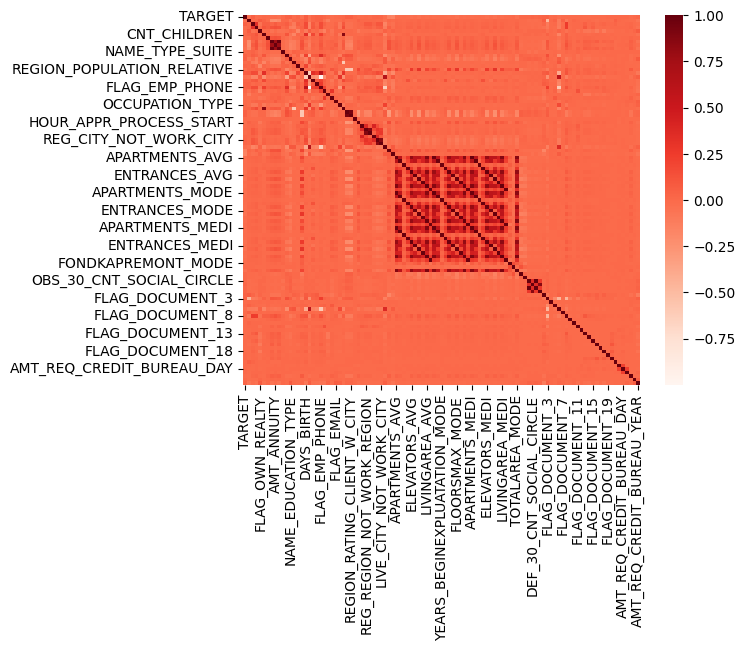

In [25]:
import seaborn as sns

sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [26]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [27]:
df = df.drop(df[to_drop], axis=1)

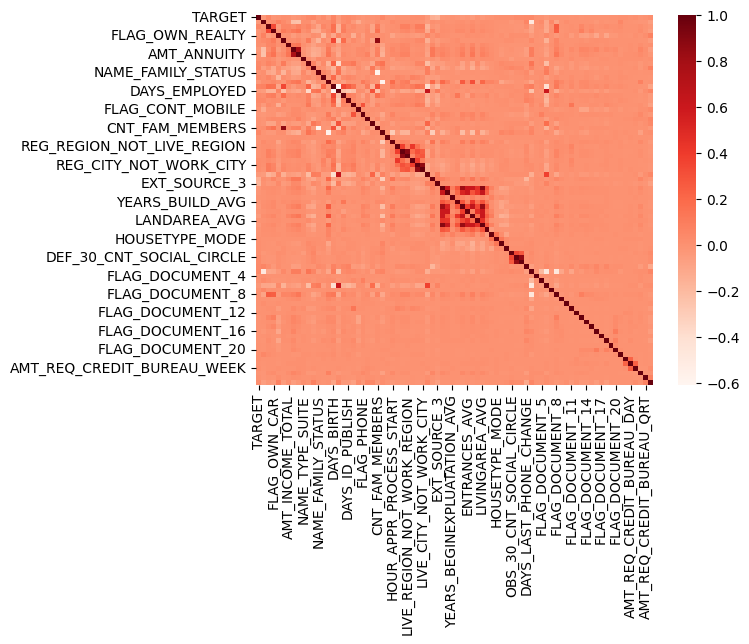

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

### Splitting data in Hold out method

In [29]:
x = df.drop('TARGET', axis=1)
y = df.TARGET

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=10, stratify=y
)
print(x_train.shape)
print(y_train.shape)
print()
print(y_train.value_counts())

(113083, 79)
(113083,)

TARGET
0    105472
1      7611
Name: count, dtype: int64


### Upsampling the minimum class

In [31]:
smt = SMOTE(random_state=10, n_jobs=-1, sampling_strategy='all')
# sampling_strategy='minority' ----> resample only the minority class;
# sampling_strategy='not minority' ----> resample all classes but the minority class;
# sampling_strategy='not majority' ----> resample all classes but the majority class;
# sampling_strategy='all' ----> resample all classes;
# sampling_strategy='auto' ----> equivalent to 'not majority'.

In [32]:
x_train, y_train = smt.fit_resample(x_train, y_train)

In [33]:
print(x_train.shape)
print(y_train.shape)

(210944, 79)
(210944,)


### Building NN model

In [34]:
model = Sequential()
model.add(Dense(units=53, activation='relu', input_dim=79))
model.add(Dropout(0.2))
model.add(Dense(units=53, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 53)                4240      
                                                                 
 dropout (Dropout)           (None, 53)                0         
                                                                 
 dense_1 (Dense)             (None, 53)                2862      
                                                                 
 dropout_1 (Dropout)         (None, 53)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 54        
                                                                 
Total params: 7,156
Trainable params: 7,156
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
21095/21095 [==============================] - 58s 3ms/step - loss: 0.4430 - accuracy: 0.7941 - val_loss: 0.4722 - val_accuracy: 0.7949
Epoch 2/20
21095/21095 [==============================] - 61s 3ms/step - loss: 0.3894 - accuracy: 0.8266 - val_loss: 0.5141 - val_accuracy: 0.7787
Epoch 3/20
21095/21095 [==============================] - 60s 3ms/step - loss: 0.3765 - accuracy: 0.8336 - val_loss: 0.4330 - val_accuracy: 0.8255
Epoch 4/20
21095/21095 [==============================] - 58s 3ms/step - loss: 0.3697 - accuracy: 0.8373 - val_loss: 0.4021 - val_accuracy: 0.8345
Epoch 5/20
21095/21095 [==============================] - 60s 3ms/step - loss: 0.3629 - accuracy: 0.8404 - val_loss: 0.3470 - val_accuracy: 0.8724
Epoch 6/20
21095/21095 [==============================] - 56s 3ms/step - loss: 0.3583 - accuracy: 0.8445 - val_loss: 0.4139 - val_accuracy: 0.8325
Epoch 7/20
21095/21095 [==============================] - 59s 3ms/step - loss: 0.3535 - accuracy: 0.8456 - val_loss: 0

In [37]:
score = model.evaluate(x_test, y_test)

884/884 [==============================] - 2s 2ms/step - loss: 0.3595 - accuracy: 0.8604


In [38]:
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.3595469295978546
Test accuracy :  0.8603516221046448


In [39]:
y_pred = model.predict(x_test)

884/884 [==============================] - 2s 2ms/step


In [40]:
y_pred

array([[0.02454097],
       [0.06980637],
       [0.23791356],
       ...,
       [0.0949352 ],
       [0.48675638],
       [0.1468138 ]], dtype=float32)

In [41]:
y_test

130760    0
94751     0
55513     0
155355    0
208533    0
         ..
138720    0
64929     0
87179     0
83531     0
187548    0
Name: TARGET, Length: 28271, dtype: int64

In [42]:
model.save("model.h5")